# Laba 1. SDA (by Alina Kragel)

In [272]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
import random

%matplotlib inline

Data Frame:

In [204]:
df=pd.read_csv(r"C:\Users\aowl2\OneDrive\Рабочий стол\var7.txt", delimiter = "\t")
df.head(10)

,Nums
0,-3.003392
1,0.941599
2,-4.775065
3,2.425775
4,-1.143677
5,-1.069726
6,0.816881
7,-1.675712
8,2.075324
9,-3.179002


Realisation plot:

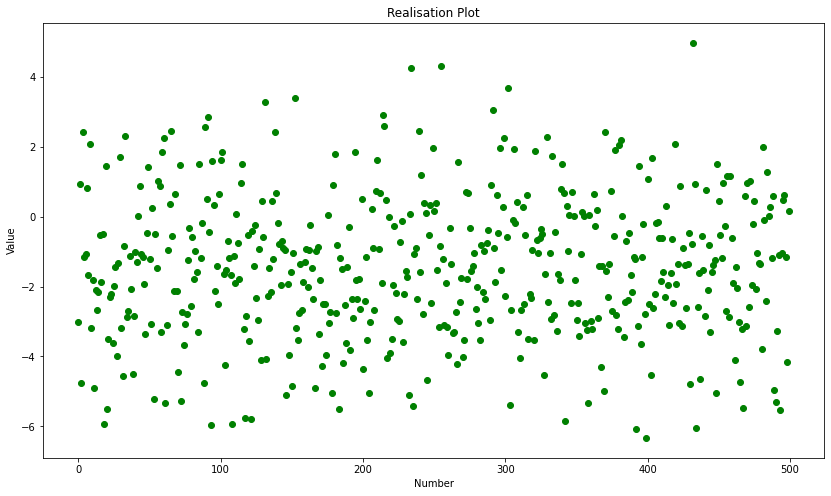

In [22]:
plt.figure(figsize=(14, 8))
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('Realisation Plot')
plt.plot(np.arange(0, len(df['Nums']), 1), df['Nums'], 'o', color='green')
plt.show()

Boxplot:

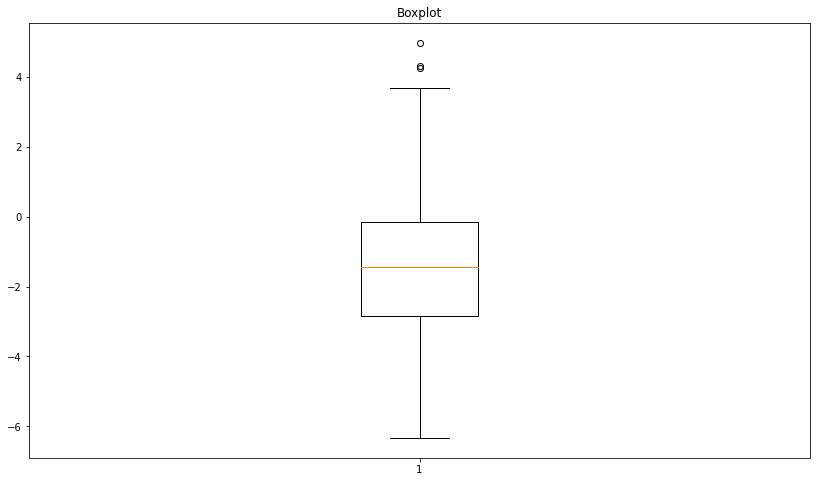

In [26]:
plt.figure(figsize=(14, 8))
plt.title('Boxplot')
plt.boxplot(df['Nums'])
plt.show()

Histograms:

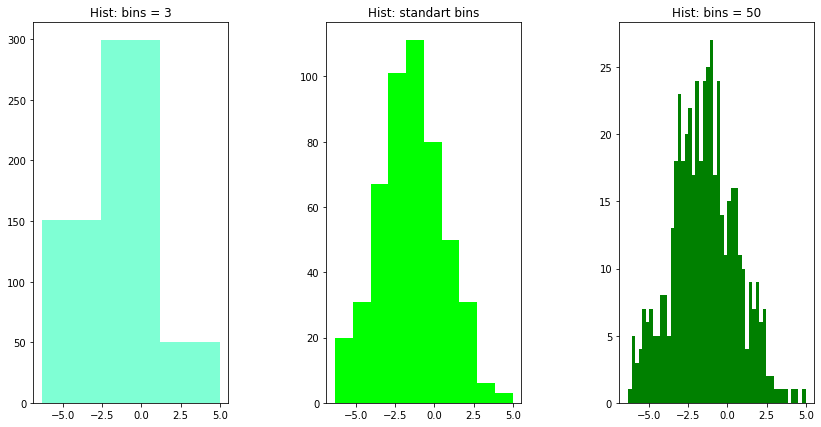

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(14,7))
plt.subplots_adjust(wspace=0.5)
axs[0].hist(df['Nums'], bins=3, color = 'aquamarine')
axs[0].set_title('Hist: bins = 3')
axs[1].hist(df['Nums'], color='lime')C
axs[1].set_title('Hist: standart bins')
axs[2].hist(df['Nums'], bins=50, color='green')
axs[2].set_title('Hist: bins = 50')
plt.show()

Numerical Сharacteristics:

In [313]:
numerical_charasteristics = pd.DataFrame({
    'Data' : ['Current Data'],
    'Mean': [df["Nums"].mean()],
    'Standard Deviation': [df["Nums"].std()],
    'Variance': [df["Nums"].var()],
    'Median: ': [df["Nums"].median()],
    'Quartile-1': [df["Nums"].quantile(0.25)],
    'Quartile-3': [df["Nums"].quantile(0.75)],
    'Asymmetry Coefficient': [df["Nums"].skew()],
    'Kurtosis Coefficient': [df["Nums"].kurtosis()],
    'Max': [df["Nums"].max()],
    'Min': [df["Nums"].min()]
})
numerical_charasteristics

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.15441,0.100668,-0.133414,4.983779,-6.336693


3-sigma Rule: The probability that a random variable deviates from its mathematical expectation by more than three standard deviations is practically zero.

In [321]:
left, right = df["Nums"].mean() - 3 * df["Nums"].std(), df["Nums"].mean() + 3 * df["Nums"].std()
interval_values = df[(df['Nums'].astype('float') >= left) & (df['Nums'].astype('float') <= right)]
probability_in = len(interval_values) / len(df['Nums'])
print('The probality of being in the interval [' + str(left) + ', ' + str(right) + '] is ' + str(probability_in))

The probality of being in the interval [-7.574659780888949, 4.672703156440948] is 0.998


Done correctly.

Working with normal distribution. Criterion χ2:

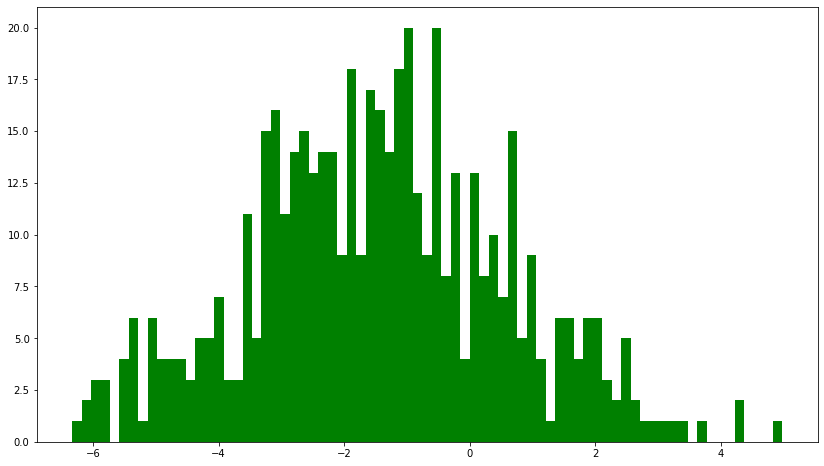

In [86]:
plt.figure(figsize=(14, 8))
plt.hist(df['Nums'], bins=75, color='green')
plt.show()

In [121]:
eta = df["Nums"].median()
sigma = math.sqrt(df["Nums"].var())
print('eta: ' + str(eta) + ', sigma: ' +str(sigma))

eta: -1.440992, sigma: 2.0412271562216495


In [122]:
teor_dist = pd.DataFrame({'Teor_nums':  np.random.normal(loc=eta, scale=sigma, size=len(df['Nums']))})
teor_dist.head(10)

,Teor_nums
0,0.013566
1,-0.990634
2,-0.504954
3,-1.135564
4,-4.505316
5,-0.616089
6,-4.440864
7,-5.514584
8,-2.850639
9,0.299835


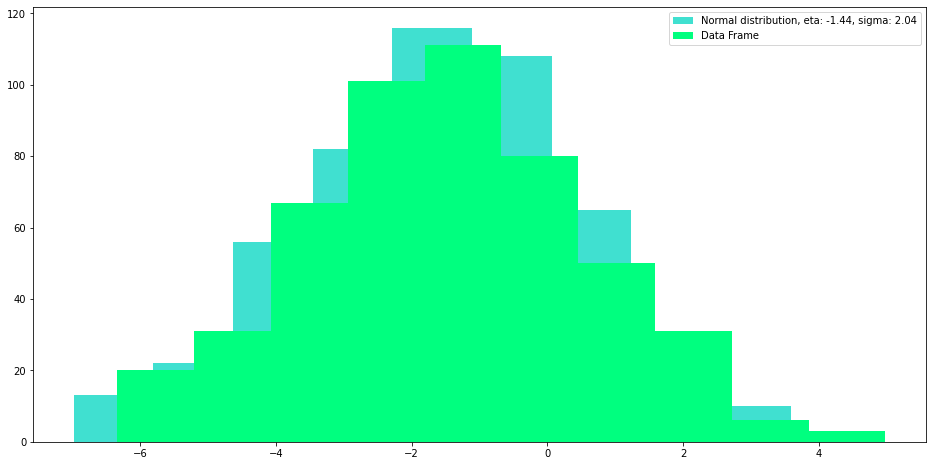

In [127]:
plt.figure(figsize = (16,8))
plt.hist(teor_dist['Teor_nums'],label = 'Normal distribution, eta: -1.44, sigma: 2.04', color = 'turquoise')
plt.hist(df['Nums'], label = 'Data Frame', color = 'springgreen')
plt.legend()
plt.show()

доделать

Empties:

In [322]:
empty_part = 0.3
nums_empty = int(len(df['Nums']) * empty_part)
df_empty = df.copy()
for _ in range(nums_empty):
    df_empty['Nums'][random.randint(0, len(df_empty['Nums']))]=np.nan
print('Empties: ' + str(df_empty.isna().sum()))
df_empty.head(10)

Empties: Nums    135
dtype: int64


,Nums
0,-3.003392
1,0.941599
2,NaN
3,2.425775
4,-1.143677
5,-1.069726
6,0.816881
7,-1.675712
8,NaN
9,-3.179002


Numerical Сharacteristics with empties:

In [323]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Data with empty spaces',
    'Mean': df_empty["Nums"].mean(),
    'Standard Deviation': df_empty["Nums"].std(),
    'Variance': df_empty["Nums"].var(),
    'Median: ': df_empty["Nums"].median(),
    'Quartile-1': df_empty["Nums"].quantile(0.25),
    'Quartile-3': df_empty["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_empty["Nums"].skew(),
    'Kurtosis Coefficient': df_empty["Nums"].kurtosis(),
    'Max': df_empty["Nums"].max(),
    'Min': df_empty["Nums"].min()
}, ignore_index = True)
numerical_charasteristics

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.154410,0.100668,-0.133414,4.983779,-6.336693
1,Data with empty spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
2,Data with empty -> mean spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
3,Censored data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
4,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
5,Data with 10 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
6,Data with 20 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
7,Data with empty spaces,-1.443310,2.018119,4.072806,-1.370058,-2.801894,-0.184273,0.064580,-0.025371,4.983779,-6.336693


Change with mean:

In [324]:
average = df_empty['Nums'].mean()
print(str(average))
df_empty['Nums'] = df_empty['Nums'].fillna(average)
df_empty.head(10)

-1.44330960339726


,Nums
0,-3.003392
1,0.941599
2,-1.443310
3,2.425775
4,-1.143677
5,-1.069726
6,0.816881
7,-1.675712
8,-1.443310
9,-3.179002


Numerical Сharacteristics after changes:

In [325]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Data with empty -> mean spaces',
    'Mean': df_empty["Nums"].mean(),
    'Standard Deviation': df_empty["Nums"].std(),
    'Variance': df_empty["Nums"].var(),
    'Median: ': df_empty["Nums"].median(),
    'Quartile-1': df_empty["Nums"].quantile(0.25),
    'Quartile-3': df_empty["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_empty["Nums"].skew(),
    'Kurtosis Coefficient': df_empty["Nums"].kurtosis(),
    'Max': df_empty["Nums"].max(),
    'Min': df_empty["Nums"].min()
}, ignore_index = True)
numerical_charasteristics

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.154410,0.100668,-0.133414,4.983779,-6.336693
1,Data with empty spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
2,Data with empty -> mean spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
3,Censored data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
4,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
5,Data with 10 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
6,Data with 20 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
7,Data with empty spaces,-1.443310,2.018119,4.072806,-1.370058,-2.801894,-0.184273,0.064580,-0.025371,4.983779,-6.336693
8,Data with empty -> mean spaces,-1.443310,1.723643,2.970945,-1.443310,-2.349048,-0.717798,0.075501,1.075554,4.983779,-6.336693


Censoring:

𝑐=(1/3)𝑥𝑚𝑎𝑥+(2/3)𝑥𝑚𝑖𝑛 

In [264]:
c = (1/3) * df['Nums'].max() + (2/3) * df['Nums'].min()
print('c: ' + str(c))
df_censored = df.copy()
df_censored[df_censored['Nums'].astype('float') < c]=np.nan
df_censored.head(10)

c: -2.5632023333333334


,Nums
0,NaN
1,0.941599
2,NaN
3,2.425775
4,-1.143677
5,-1.069726
6,0.816881
7,-1.675712
8,2.075324
9,NaN


Numerical Сharacteristics for censored data frame:

In [328]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Censored data',
    'Mean': df_censored["Nums"].mean(),
    'Standard Deviation': df_censored["Nums"].std(),
    'Variance': df_censored["Nums"].var(),
    'Median: ': df_censored["Nums"].median(),
    'Quartile-1': df_censored["Nums"].quantile(0.25),
    'Quartile-3': df_censored["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_censored["Nums"].skew(),
    'Kurtosis Coefficient': df_censored["Nums"].kurtosis(),
    'Max': df_censored["Nums"].max(),
    'Min': df_censored["Nums"].min()
}, ignore_index = True)
numerical_charasteristics
print(str(df_censored["Nums"].var()))

1.5034541122102754


Change with mean:

In [265]:
average = df_censored['Nums'].mean()
print(str(average))
df_censored['Nums'] = df_censored['Nums'].fillna(average)
df_censored.head(10)

-0.4415454215243553


,Nums
0,-0.441545
1,0.941599
2,-0.441545
3,2.425775
4,-1.143677
5,-1.069726
6,0.816881
7,-1.675712
8,2.075324
9,-0.441545


Numerical Сharacteristics after changes:

In [326]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Censored->with mean data',
    'Mean': df_censored["Nums"].mean(),
    'Standard Deviation': df_censored["Nums"].std(),
    'Variance': df_censored["Nums"].var(),
    'Median: ': df_censored["Nums"].median(),
    'Quartile-1': df_censored["Nums"].quantile(0.25),
    'Quartile-3': df_censored["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_censored["Nums"].skew(),
    'Kurtosis Coefficient': df_censored["Nums"].kurtosis(),
    'Max': df_censored["Nums"].max(),
    'Min': df_censored["Nums"].min()
}, ignore_index = True)
numerical_charasteristics
print(df_censored["Nums"].var())

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.154410,0.100668,-0.133414,4.983779,-6.336693
1,Data with empty spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
2,Data with empty -> mean spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
3,Censored data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
4,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
5,Data with 10 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
6,Data with 20 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
7,Data with empty spaces,-1.443310,2.018119,4.072806,-1.370058,-2.801894,-0.184273,0.064580,-0.025371,4.983779,-6.336693
8,Data with empty -> mean spaces,-1.443310,1.723643,2.970945,-1.443310,-2.349048,-0.717798,0.075501,1.075554,4.983779,-6.336693
9,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418


Outliers. 𝐿=𝑥𝑚𝑎𝑥−𝑥𝑚𝑖𝑛. Add 5 elements >= 𝑥𝑚𝑎𝑥+𝐿 & 5 elements <= 𝑥𝑚𝑖𝑛−𝐿.

In [294]:
df_outliers = df.copy()
L = df['Nums'].max() - df_outliers['Nums'].min()
for i in range(5):
    d1 = {'Nums': df_outliers['Nums'].max() + L + random.random() * df_outliers['Nums'].mean()}
    df_outliers = df_outliers.append(d1,  ignore_index=True)
    d2 = {'Nums': df_outliers['Nums'].min() - L - random.random() * df_outliers['Nums'].mean()}
    df_outliers = df_outliers.append(d2,  ignore_index=True)
df_outliers.tail(10)

,Nums
500,14.925979
501,-17.618058
502,25.422825
503,-28.828992
504,36.019241
505,-39.056622
506,46.407986
507,-49.494509
508,56.766884
509,-59.770444


In [319]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Data with 10 outliers',
    'Mean': df_outliers["Nums"].mean(),
    'Standard Deviation': df_outliers["Nums"].std(),
    'Variance': df_outliers["Nums"].var(),
    'Median: ': df_outliers["Nums"].median(),
    'Quartile-1': df_outliers["Nums"].quantile(0.25),
    'Quartile-3': df_outliers["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_outliers["Nums"].skew(),
    'Kurtosis Coefficient': df_outliers["Nums"].kurtosis(),
    'Max': df_outliers["Nums"].max(),
    'Min': df_outliers["Nums"].min()
}, ignore_index = True)
numerical_charasteristics

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.154410,0.100668,-0.133414,4.983779,-6.336693
1,Data with empty spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
2,Data with empty -> mean spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
3,Censored data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
4,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
5,Data with 10 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444


In [296]:
for i in range(10):
    k = random.randint(0, 1)
    d = {'Nums': df_outliers['Nums'].max() + L + k * random.random()}
    df_outliers = df_outliers.append(d,  ignore_index=True)
df_outliers.tail(10)

,Nums
510,68.478115
511,79.798587
512,91.959463
513,103.451346
514,114.771818
515,126.092290
516,137.412762
517,148.733234
518,160.780434
519,172.463609


In [320]:
numerical_charasteristics = numerical_charasteristics.append({
    'Data' : 'Data with 20 outliers',
    'Mean': df_outliers["Nums"].mean(),
    'Standard Deviation': df_outliers["Nums"].std(),
    'Variance': df_outliers["Nums"].var(),
    'Median: ': df_outliers["Nums"].median(),
    'Quartile-1': df_outliers["Nums"].quantile(0.25),
    'Quartile-3': df_outliers["Nums"].quantile(0.75),
    'Asymmetry Coefficient': df_outliers["Nums"].skew(),
    'Kurtosis Coefficient': df_outliers["Nums"].kurtosis(),
    'Max': df_outliers["Nums"].max(),
    'Min': df_outliers["Nums"].min()
}, ignore_index = True)
numerical_charasteristics

,Data,Mean,Standard Deviation,Variance,Median:,Quartile-1,Quartile-3,Asymmetry Coefficient,Kurtosis Coefficient,Max,Min
0,Current Data,-1.450978,2.041227,4.166608,-1.440992,-2.848548,-0.154410,0.100668,-0.133414,4.983779,-6.336693
1,Data with empty spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
2,Data with empty -> mean spaces,-1.446040,1.766682,3.121167,-1.446040,-2.401725,-0.607617,0.134585,1.039528,4.983779,-6.336693
3,Censored data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
4,Censored->with mean data,-0.441545,1.226154,1.503454,-0.441545,-1.190111,-0.154410,0.969568,1.724148,4.983779,-2.519418
5,Data with 10 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
6,Data with 20 outliers,0.890821,18.354068,336.871824,-1.406052,-2.848548,0.046724,6.522303,49.158362,172.463609,-59.770444
